 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
from sklearn import preprocessing

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

100%|██████████| 9912422/9912422 [00:00<00:00, 87817147.54it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 4677415.01it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33283561.52it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11869488.33it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

n_classes = 10

##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.maximum(0, inp)
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = np.maximum(0, np.sign(inp))
  return outp

#Complete the below function to impliment softmax activation function

def softmax(inp):
    max_val = np.max(inp, axis=1, keepdims=True)
    exps = np.exp(inp - max_val)
    exps_sum = np.sum(exps, axis=1, keepdims=True)
    outp = exps / exps_sum
    return outp


def fwdPropagate(inputs, weights):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  a1 = np.dot(inputs, W1)
  z1 = ReLu(a1)
  a2 = np.dot(z1, W2)
  z2 = ReLu(a2)
  a3 = np.dot(z2, W3)
  out = softmax(a3)

  outps = [inputs, z1, z2, out]

  #Return the requires outputs, i.e., final output and intermediate activations
  return outps


#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients

  W1 = W1 - learning_rate * dj_dw1
  W2 = W2 - learning_rate * dj_dw2
  W3 = W3 - learning_rate * dj_dw3

  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  W1, W2, W3 = weights

  #Compute the gradients
  Z2 = activations[2]

  Delta1 = activations[-1] - targets
  dj_dw3 = np.dot(Z2.T, Delta1)

  Z1 = activations[1]

  W3_aug = W3
  Z2_aug = Z2

  Delta2 = np.multiply(np.dot(Delta1, W3_aug.T), gradReLu(Z2_aug))
  dj_dw2 = np.dot(Z1.T, Delta2)

  Z0 = activations[0]

  W2_aug = W2
  Z1_aug = Z1
  Delta3 = np.multiply(np.dot(Delta2, W2_aug.T), gradReLu(Z1_aug))
  dj_dw1 = np.dot(Z0.T, Delta3)

  #Update the paramters using gradients
  gradients = [dj_dw1, dj_dw2, dj_dw3]

  weights = applyGradients(weights, gradients, learning_rate)

  #Return the updated parameters
  return weights


##################################################
#Train the network
##################################################

def One_of_k_coding(targets, num_classes):
    new_targets = np.zeros((targets.shape[0], num_classes))
    for i in range(targets.shape[0]):
        new_targets[i, targets[i]] = 1
    return new_targets

def reverse_one_of_k(new_targets, num_classes):
    targets = np.argmax(new_targets, axis=1)
    return targets

def cost_function(output, target):
    return -1 * np.sum(np.multiply(np.log(output), target))


#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 1, epochs=30, train_val_split=0.9, learning_rate=0.001):
  #Set the hyperparameters
  hidden_units = 2
  n_classes = 10
  n_samples = inputs.shape[0]

  # Targets must be 1 of K coding
  targets_one_of_k = One_of_k_coding(targets_idx, n_classes)

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  data = np.hstack((inputs, targets_one_of_k))
  np.random.shuffle(data)

  num_train = int(train_val_split * inputs.shape[0])
  train_data = data[:num_train, :]
  train_targets = data[:num_train, data.shape[1]-10 : data.shape[1]]
  n_batches = int(np.ceil(train_data.shape[0]/batch_size))

  val_data = data[num_train:, :]
  val_targets = data[num_train:, data.shape[1]-10 : data.shape[1]]

  #Randomly initialize the weights
  W1 = (np.random.rand(inputs.shape[1] , 512) - 0.5) * 0.1
  W2 = (np.random.rand(512, 512) - 0.5) * 0.3
  W3 = (np.random.rand(512, 10) - 0.5) * 0.3

  weights = [W1, W2, W3]

  #Interate for epochs times
  for epoch in range(epochs):
    print("Epoch: " + str(epoch))
    #Shuffle the training data
    np.random.shuffle(train_data)
    #Interate through the batches of data
    for batch in range(n_batches):
      #Get the batch of data
      if batch == n_batches - 1:
          data_b = train_data[batch*batch_size:]
      else:
          data_b = train_data[batch*batch_size:(batch+1)*batch_size]
      #Forward propagation
      inputs_b = data_b[:, :inputs.shape[1]]
      targets_b = data_b[:, inputs.shape[1]:]
      activations = fwdPropagate(inputs_b, weights)

      #Backward propagation
      weights = backPropagate(inputs_b, targets_b, weights, activations, learning_rate)

  #Compute outpus on trianing data
  new_targets = fwdPropagate(train_data[:, :data.shape[1]-n_classes], weights)[-1]
  training_output = reverse_one_of_k(new_targets, n_classes)

  #Compute training accuracy, and training error
  train_accuracy = np.mean(training_output == reverse_one_of_k(train_targets, n_classes))

  #Compute outputs on validation data
  new_targets_val = fwdPropagate(val_data[:, :data.shape[1]-n_classes], weights)[-1]
  val_output = reverse_one_of_k(new_targets_val, n_classes)


  #Compute validation accuracy, and validation error
  val_accuracy = np.mean(val_output == reverse_one_of_k(val_targets, n_classes))

  #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy

  print("Train Accuracy:")
  print(train_accuracy)
  print("Validation Accuracy:")
  print(val_accuracy)

  #Save the parameter s of network
  return weights


#Call the training function to train the network
mnist_traindata = np.reshape(mnist_traindata, (mnist_traindata.shape[0], -1))
mnist_testdata = np.reshape(mnist_testdata, (mnist_testdata.shape[0], -1))


mnist_traindata = mnist_traindata[:, :]/256

targets_idx = mnist_trainlabel[:]

weights = training(mnist_traindata, targets_idx, batch_size = 20, epochs=30, train_val_split=0.9, learning_rate=0.001)

##################################################
#Evaluate the performance on test data
##################################################

test_inputs = np.reshape(mnist_testdata, (mnist_testdata.shape[0], -1))
mnist_testlabel = np.reshape(mnist_testlabel, (mnist_testlabel.shape[0], 1))

test_inputs = test_inputs/256

new_targets_test = fwdPropagate(test_inputs, weights)[-1]
test_output = reverse_one_of_k(new_targets_test, n_classes)
mnist_testlabel = np.reshape(mnist_testlabel, (mnist_testlabel.shape[0],))

#Compute validation accuracy, and validation error
test_accuracy = np.mean(test_output == mnist_testlabel)
print("Test Accuracy:")
print(test_accuracy)

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13


KeyboardInterrupt: 

<b> Report your observations </b>

1. Overfits data, when not regularized

2. Highly sensitive to input values being too large or too small due to the np.exp() function

3.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
##################################################
#Train the network with different activation functions
##################################################

n_classes = 10

def sigmoid(inp):
  outp = 1/(1+np.exp(-1*inp))
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradSigmoid(inp):
  outp = sigmoid(inp) * (1 - sigmoid(inp))
  return outp


def fwdPropagate(inputs, weights):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  a1 = np.dot(inputs, W1)
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2)
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3)
  out = softmax(a3)

  outps = [inputs, z1, z2, out]

  #Return the requires outputs, i.e., final output and intermediate activations
  return outps


#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  W1, W2, W3 = weights

  #Compute the gradients
  Z2 = activations[2]

  Delta1 = activations[-1] - targets
  dj_dw3 = np.dot(Z2.T, Delta1)

  Z1 = activations[1]

  W3_aug = W3
  Z2_aug = Z2

  Delta2 = np.multiply(np.dot(Delta1, W3_aug.T), gradSigmoid(Z2_aug))
  dj_dw2 = np.dot(Z1.T, Delta2)

  Z0 = activations[0]

  W2_aug = W2
  Z1_aug = Z1
  Delta3 = np.multiply(np.dot(Delta2, W2_aug.T), gradSigmoid(Z1_aug))
  dj_dw1 = np.dot(Z0.T, Delta3)

  #Update the paramters using gradients
  gradients = [dj_dw1, dj_dw2, dj_dw3]

  weights = applyGradients(weights, gradients, learning_rate)

  #Return the updated parameters
  return weights

mnist_traindata = np.reshape(mnist_traindata, (mnist_traindata.shape[0], -1))
mnist_testdata = np.reshape(mnist_testdata, (mnist_testdata.shape[0], -1))


mnist_traindata = mnist_traindata[:, :]/256

targets_idx = mnist_trainlabel[:]

weights = training(mnist_traindata, targets_idx, batch_size = 20, epochs=30, train_val_split=0.9, learning_rate=0.001)

##################################################
#Evaluate the performance on test data
##################################################

test_inputs = np.reshape(mnist_testdata, (mnist_testdata.shape[0], -1))
mnist_testlabel = np.reshape(mnist_testlabel, (mnist_testlabel.shape[0], 1))

test_inputs = test_inputs/256

new_targets_test = fwdPropagate(test_inputs, weights)[-1]
test_output = reverse_one_of_k(new_targets_test, n_classes)
mnist_testlabel = np.reshape(mnist_testlabel, (mnist_testlabel.shape[0],))

#Compute validation accuracy, and validation error
test_accuracy = np.mean(test_output == mnist_testlabel)
print("Test Accuracy for sigmoid activation:")
print(test_accuracy)



Streaming output truncated to the last 5000 lines.
 [0.07745358 0.12805208 0.08025416 0.12890229 0.05315835 0.08889779
  0.14547872 0.1509702  0.05810085 0.08873199]
 [0.07745358 0.12805208 0.08025416 0.12890229 0.05315835 0.08889779
  0.14547872 0.1509702  0.05810085 0.08873199]
 [0.07745358 0.12805208 0.08025416 0.12890229 0.05315835 0.08889779
  0.14547872 0.1509702  0.05810085 0.08873199]
 [0.07745358 0.12805208 0.08025416 0.12890229 0.05315835 0.08889779
  0.14547872 0.1509702  0.05810085 0.08873199]
 [0.07745358 0.12805208 0.08025416 0.12890229 0.05315835 0.08889779
  0.14547872 0.1509702  0.05810085 0.08873199]
 [0.07745358 0.12805208 0.08025416 0.12890229 0.05315835 0.08889779
  0.14547872 0.1509702  0.05810085 0.08873199]
 [0.07745358 0.12805208 0.08025416 0.12890229 0.05315835 0.08889779
  0.14547872 0.1509702  0.05810085 0.08873199]
 [0.07745358 0.12805208 0.08025416 0.12890229 0.05315835 0.08889779
  0.14547872 0.1509702  0.05810085 0.08873199]
 [0.07745358 0.12805208 0.080

In [ ]:
def tanh(inp):
  outp = 2/(1+np.exp(-2*inp)) - 1
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradtanh(inp):
  outp = 1 - tanh(inp)**2
  return outp


def fwdPropagate(inputs, weights):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  a1 = np.dot(inputs, W1)
  z1 = tanh(a1)
  a2 = np.dot(z1, W2)
  z2 = tanh(a2)
  a3 = np.dot(z2, W3)
  out = softmax(a3)

  outps = [inputs, z1, z2, out]

  #Return the requires outputs, i.e., final output and intermediate activations
  return outps


#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  W1, W2, W3 = weights

  #Compute the gradients
  Z2 = activations[2]

  Delta1 = activations[-1] - targets
  dj_dw3 = np.dot(Z2.T, Delta1)

  Z1 = activations[1]

  W3_aug = W3
  Z2_aug = Z2

  Delta2 = np.multiply(np.dot(Delta1, W3_aug.T), gradtanh(Z2_aug))
  dj_dw2 = np.dot(Z1.T, Delta2)

  Z0 = activations[0]

  W2_aug = W2
  Z1_aug = Z1
  Delta3 = np.multiply(np.dot(Delta2, W2_aug.T), gradtanh(Z1_aug))
  dj_dw1 = np.dot(Z0.T, Delta3)

  #Update the paramters using gradients
  gradients = [dj_dw1, dj_dw2, dj_dw3]

  weights = applyGradients(weights, gradients, learning_rate)

  #Return the updated parameters
  return weights

mnist_traindata = np.reshape(mnist_traindata, (mnist_traindata.shape[0], -1))
mnist_testdata = np.reshape(mnist_testdata, (mnist_testdata.shape[0], -1))


mnist_traindata = mnist_traindata[:, :]/256

targets_idx = mnist_trainlabel[:]

weights = training(mnist_traindata, targets_idx, batch_size = 20, epochs=30, train_val_split=0.9, learning_rate=0.001)

##################################################
#Evaluate the performance on test data
##################################################

test_inputs = np.reshape(mnist_testdata, (mnist_testdata.shape[0], -1))
mnist_testlabel = np.reshape(mnist_testlabel, (mnist_testlabel.shape[0], 1))

test_inputs = test_inputs/256

new_targets_test = fwdPropagate(test_inputs, weights)[-1]
test_output = reverse_one_of_k(new_targets_test, n_classes)
mnist_testlabel = np.reshape(mnist_testlabel, (mnist_testlabel.shape[0],))

#Compute validation accuracy, and validation error
test_accuracy = np.mean(test_output == mnist_testlabel)
print("Test Accuracy for tanh activation:")
print(test_accuracy)

##################################################
#Evaluate the performance on MNIST test data
##################################################

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Train Accuracy:
1.0
Validation Accuracy:
0.83


<ipython-input-22-d1812b2a045e>:2: RuntimeWarning: overflow encountered in exp
  outp = 2/(1+np.exp(-2*inp)) - 1


Test Accuracy for tanh activation:
0.8521


<b> Report your observations </b>

1. Gradients for sigmoid is small (vanishing gradients) and hence doesn't give as good results as ReLu activation function


<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
##################################################
#Train the network using Adam optimizer
##################################################






##################################################
#Compare the accuracies and report your observations
##################################################








<b> Report your observations </b>

1.

2.

3.



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
##################################################
#Training with weight regularization
##################################################
# Remaining
# Observations
# Convert Use entire test set
# Use cost function


#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

n_classes = 10

##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.maximum(0, inp)
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = np.maximum(0, np.sign(inp))
  return outp

#Complete the below function to impliment softmax activation function

def softmax(inp):
    max_val = np.max(inp, axis=1, keepdims=True)
    exps = np.exp(inp - max_val)
    exps_sum = np.sum(exps, axis=1, keepdims=True)
    outp = exps / exps_sum
    return outp


def fwdPropagate(inputs, weights):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  a1 = np.dot(inputs, W1)
  z1 = ReLu(a1)
  a2 = np.dot(z1, W2)
  z2 = ReLu(a2)
  a3 = np.dot(z2, W3)
  out = softmax(a3)

  outps = [inputs, z1, z2, out]

  #Return the requires outputs, i.e., final output and intermediate activations
  return outps


#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients

  W1 = W1 - learning_rate * dj_dw1
  W2 = W2 - learning_rate * dj_dw2
  W3 = W3 - learning_rate * dj_dw3

  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

  #Assuming Frovenius Norm Squared as the regularization expression

  W1, W2, W3 = weights

  LM = 0.5
  #Compute the gradients
  Z2 = activations[2]

  Delta1 = activations[-1] - targets
  dj_dw3 = np.dot(Z2.T, Delta1) + 2*LM*W3

  Z1 = activations[1]

  W3_aug = W3
  Z2_aug = Z2

  Delta2 = np.multiply(np.dot(Delta1, W3_aug.T), gradReLu(Z2_aug))
  dj_dw2 = np.dot(Z1.T, Delta2) + 2*LM*W2

  Z0 = activations[0]

  W2_aug = W2
  Z1_aug = Z1
  Delta3 = np.multiply(np.dot(Delta2, W2_aug.T), gradReLu(Z1_aug))
  dj_dw1 = np.dot(Z0.T, Delta3) + 2*LM*W1

  #Update the paramters using gradients
  gradients = [dj_dw1, dj_dw2, dj_dw3]

  weights = applyGradients(weights, gradients, learning_rate)

  #Return the updated parameters
  return weights


##################################################
#Train the network
##################################################

def One_of_k_coding(targets, num_classes):
    new_targets = np.zeros((targets.shape[0], num_classes))
    for i in range(targets.shape[0]):
        new_targets[i, targets[i]] = 1
    return new_targets

def reverse_one_of_k(new_targets, num_classes):
    targets = np.argmax(new_targets, axis=1)
    return targets

def cost_function(output, target):
    return -1 * np.sum(np.multiply(np.log(output), target))


#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 1, epochs=30, train_val_split=0.9, learning_rate=0.001):
  #Set the hyperparameters
  hidden_units = 2
  n_classes = 10
  n_samples = inputs.shape[0]

  # Targets must be 1 of K coding
  targets_one_of_k = One_of_k_coding(targets_idx, n_classes)

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  data = np.hstack((inputs, targets_one_of_k))
  np.random.shuffle(data)

  num_train = int(train_val_split * inputs.shape[0])
  train_data = data[:num_train, :]
  train_targets = data[:num_train, data.shape[1]-10 : data.shape[1]]
  n_batches = int(np.ceil(train_data.shape[0]/batch_size))

  val_data = data[num_train:, :]
  val_targets = data[num_train:, data.shape[1]-10 : data.shape[1]]

  #Randomly initialize the weights
  W1 = (np.random.rand(inputs.shape[1] , 512) - 0.5) * 0.1
  W2 = (np.random.rand(512, 512) - 0.5) * 0.3
  W3 = (np.random.rand(512, 10) - 0.5) * 0.3

  weights = [W1, W2, W3]

  #Interate for epochs times
  for epoch in range(epochs):
    print("Epoch: " + str(epoch))
    #Shuffle the training data
    np.random.shuffle(train_data)
    #Interate through the batches of data
    for batch in range(n_batches):
      #Get the batch of data
      if batch == n_batches - 1:
          data_b = train_data[batch*batch_size:]
      else:
          data_b = train_data[batch*batch_size:(batch+1)*batch_size]
      #Forward propagation
      inputs_b = data_b[:, :inputs.shape[1]]
      targets_b = data_b[:, inputs.shape[1]:]
      activations = fwdPropagate(inputs_b, weights)

      #Backward propagation
      weights = backPropagate(inputs_b, targets_b, weights, activations, learning_rate)

  #Compute outpus on trianing data
  new_targets = fwdPropagate(train_data[:, :data.shape[1]-n_classes], weights)[-1]
  training_output = reverse_one_of_k(new_targets, n_classes)

  #Compute training accuracy, and training error
  train_accuracy = np.mean(training_output == reverse_one_of_k(train_targets, n_classes))

  #Compute outputs on validation data
  new_targets_val = fwdPropagate(val_data[:, :data.shape[1]-n_classes], weights)[-1]
  val_output = reverse_one_of_k(new_targets_val, n_classes)


  #Compute validation accuracy, and validation error
  val_accuracy = np.mean(val_output == reverse_one_of_k(val_targets, n_classes))

  #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy

  print("Train Accuracy:")
  print(train_accuracy)
  print("Validation Accuracy:")
  print(val_accuracy)

  #Save the parameter s of network
  return weights


#Call the training function to train the network
mnist_traindata = np.reshape(mnist_traindata, (mnist_traindata.shape[0], -1))
mnist_testdata = np.reshape(mnist_testdata, (mnist_testdata.shape[0], -1))


mnist_traindata = mnist_traindata[:1000, :]/256

targets_idx = mnist_trainlabel[:1000]

weights = training(mnist_traindata, targets_idx, batch_size = 20, epochs=30, train_val_split=0.9, learning_rate=0.001)

##################################################
#Evaluate the performance on test data
##################################################

test_inputs = np.reshape(mnist_testdata, (mnist_testdata.shape[0], -1))
mnist_testlabel = np.reshape(mnist_testlabel, (mnist_testlabel.shape[0], 1))

test_inputs = test_inputs/256

new_targets_test = fwdPropagate(test_inputs, weights)[-1]
test_output = reverse_one_of_k(new_targets_test, n_classes)
mnist_testlabel = np.reshape(mnist_testlabel, (mnist_testlabel.shape[0],))

#Compute validation accuracy, and validation error
test_accuracy = np.mean(test_output == mnist_testlabel)
print("Test Accuracy:")
print(test_accuracy)

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Train Accuracy:
0.9377777777777778
Validation Accuracy:
0.84
Test Accuracy:
0.8546


<b> Report your observations </b>

1. Weight Regularization, Dropout technique and Early Stopping helps with overfitting, since the training and testing errors come closer



In [ ]:
#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

n_classes = 10

##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.maximum(0, inp)
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = np.maximum(0, np.sign(inp))
  return outp

#Complete the below function to impliment softmax activation function

def softmax(inp):
    max_val = np.max(inp, axis=1, keepdims=True)
    exps = np.exp(inp - max_val)
    exps_sum = np.sum(exps, axis=1, keepdims=True)
    outp = exps / exps_sum
    return outp


def fwdPropagate(inputs, weights, Masks):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  a1 = np.dot(inputs, W1)
  z1 = ReLu(a1)
  z1 = np.multiply(z1, Masks[0].T)
  a2 = np.dot(z1, W2)
  z2 = ReLu(a2)
  z2 = np.multiply(z2, Masks[1].T)
  a3 = np.dot(z2, W3)
  out = softmax(a3)

  outps = [inputs, z1, z2, out]

  #Return the requires outputs, i.e., final output and intermediate activations
  return outps


#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients

  W1 = W1 - learning_rate * dj_dw1
  W2 = W2 - learning_rate * dj_dw2
  W3 = W3 - learning_rate * dj_dw3

  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate, Masks):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  W1, W2, W3 = weights

  #Compute the gradients
  Z2 = activations[2]

  Delta1 = activations[-1] - targets
  dj_dw3 = np.dot(Z2.T, Delta1)

  Z1 = activations[1]

  W3_aug = W3
  Z2_aug = Z2

  Delta2 = np.multiply(np.multiply(np.dot(Delta1, W3_aug.T), gradReLu(Z2_aug)), Masks[1].T)
  dj_dw2 = np.dot(Z1.T, Delta2)

  Z0 = activations[0]

  W2_aug = W2
  Z1_aug = Z1

  Delta3 = np.multiply(np.multiply(np.dot(Delta2, W2_aug.T), gradReLu(Z1_aug)), Masks[0].T)
  dj_dw1 = np.dot(Z0.T, Delta3)

  #Update the paramters using gradients
  gradients = [dj_dw1, dj_dw2, dj_dw3]

  weights = applyGradients(weights, gradients, learning_rate)

  #Return the updated parameters
  return weights


##################################################
#Train the network
##################################################

def One_of_k_coding(targets, num_classes):
    new_targets = np.zeros((targets.shape[0], num_classes))
    for i in range(targets.shape[0]):
        new_targets[i, targets[i]] = 1
    return new_targets

def reverse_one_of_k(new_targets, num_classes):
    targets = np.argmax(new_targets, axis=1)
    return targets

def cost_function(output, target):
    return -1 * np.sum(np.multiply(np.log(output), target))


#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 1, epochs=30, train_val_split=0.9, learning_rate=0.001, mask_prob=0.8):
  #Set the hyperparameters
  hidden_units = 2
  n_classes = 10
  n_samples = inputs.shape[0]

  # Targets must be 1 of K coding
  targets_one_of_k = One_of_k_coding(targets_idx, n_classes)

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  data = np.hstack((inputs, targets_one_of_k))
  np.random.shuffle(data)

  num_train = int(train_val_split * inputs.shape[0])
  train_data = data[:num_train, :]
  train_targets = data[:num_train, data.shape[1]-10 : data.shape[1]]
  n_batches = int(np.ceil(train_data.shape[0]/batch_size))

  val_data = data[num_train:, :]
  val_targets = data[num_train:, data.shape[1]-10 : data.shape[1]]

  #Randomly initialize the weights
  W1 = (np.random.rand(inputs.shape[1] , 512) - 0.5) * 0.1
  W2 = (np.random.rand(512, 512) - 0.5) * 0.3
  W3 = (np.random.rand(512, 10) - 0.5) * 0.3

  weights = [W1, W2, W3]

  #Interate for epochs times
  for epoch in range(epochs):
    print("Epoch: " + str(epoch))
    #Shuffle the training data
    np.random.shuffle(train_data)
    #Interate through the batches of data
    for batch in range(n_batches):
      #Get the batch of data
      if batch == n_batches - 1:
          data_b = train_data[batch*batch_size:]
      else:
          data_b = train_data[batch*batch_size:(batch+1)*batch_size]
      M1 = np.random.binomial(1, mask_prob, (W2.shape[0], 1))
      M2 = np.random.binomial(1, mask_prob, (W3.shape[0], 1))

      Masks = [M1, M2]
      #Forward propagation
      inputs_b = data_b[:, :inputs.shape[1]]
      targets_b = data_b[:, inputs.shape[1]:]
      activations = fwdPropagate(inputs_b, weights, Masks)

      #Backward propagation
      weights = backPropagate(inputs_b, targets_b, weights, activations, learning_rate, Masks)


  M1 = np.ones((W2.shape[0], 1))
  M2 = np.ones((W3.shape[0], 1))

  Masks = [M1, M2]
  #Compute outpus on trianing data
  new_targets = fwdPropagate(train_data[:, :data.shape[1]-n_classes], weights, Masks)[-1]
  training_output = reverse_one_of_k(new_targets, n_classes)

  #Compute training accuracy, and training error
  train_accuracy = np.mean(training_output == reverse_one_of_k(train_targets, n_classes))

  #Compute outputs on validation data
  new_targets_val = fwdPropagate(val_data[:, :data.shape[1]-n_classes], weights, Masks)[-1]
  val_output = reverse_one_of_k(new_targets_val, n_classes)


  #Compute validation accuracy, and validation error
  val_accuracy = np.mean(val_output == reverse_one_of_k(val_targets, n_classes))

  #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy

  print("Train Accuracy:")
  print(train_accuracy)
  print("Validation Accuracy:")
  print(val_accuracy)

  #Save the parameter s of network
  return weights


#Call the training function to train the network
mnist_traindata = np.reshape(mnist_traindata, (mnist_traindata.shape[0], -1))
mnist_testdata = np.reshape(mnist_testdata, (mnist_testdata.shape[0], -1))

mask_probability = 0.8

mnist_traindata = mnist_traindata[:, :]/256

targets_idx = mnist_trainlabel[:]

weights = training(mnist_traindata, targets_idx, batch_size = 20, epochs=30, train_val_split=0.9, learning_rate=0.001, mask_prob = mask_probability)

##################################################
#Evaluate the performance on test data
##################################################

test_inputs = np.reshape(mnist_testdata, (mnist_testdata.shape[0], -1))
mnist_testlabel = np.reshape(mnist_testlabel, (mnist_testlabel.shape[0], 1))

test_inputs = test_inputs/256

W2 = weights[1]
W3 = weights[2]

M1 = np.ones((W2.shape[0], 1))
M2 = np.ones((W3.shape[0], 1))

Masks = [M1, M2]

new_targets_test = fwdPropagate(test_inputs, weights, Masks)[-1]
test_output = reverse_one_of_k(new_targets_test, n_classes)
mnist_testlabel = np.reshape(mnist_testlabel, (mnist_testlabel.shape[0],))

#Compute validation accuracy, and validation error
test_accuracy = np.mean(test_output == mnist_testlabel)
print("Test Accuracy:")
print(test_accuracy)

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Train Accuracy:
0.9955555555555555
Validation Accuracy:
0.92
Test Accuracy:
0.8812


In [ ]:
##################################################
#Training with early stopping criterion
##################################################

# Remaining
# Observations
# Convert Use entire test set
# Use cost function


#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

n_classes = 10

##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.maximum(0, inp)
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = np.maximum(0, np.sign(inp))
  return outp

#Complete the below function to impliment softmax activation function

def softmax(inp):
    max_val = np.max(inp, axis=1, keepdims=True)
    exps = np.exp(inp - max_val)
    exps_sum = np.sum(exps, axis=1, keepdims=True)
    outp = exps / exps_sum
    return outp


def fwdPropagate(inputs, weights):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  a1 = np.dot(inputs, W1)
  z1 = ReLu(a1)
  a2 = np.dot(z1, W2)
  z2 = ReLu(a2)
  a3 = np.dot(z2, W3)
  out = softmax(a3)

  outps = [inputs, z1, z2, out]

  #Return the requires outputs, i.e., final output and intermediate activations
  return outps


#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients

  W1 = W1 - learning_rate * dj_dw1
  W2 = W2 - learning_rate * dj_dw2
  W3 = W3 - learning_rate * dj_dw3

  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  W1, W2, W3 = weights

  #Compute the gradients
  Z2 = activations[2]

  Delta1 = activations[-1] - targets
  dj_dw3 = np.dot(Z2.T, Delta1)

  Z1 = activations[1]

  W3_aug = W3
  Z2_aug = Z2

  Delta2 = np.multiply(np.dot(Delta1, W3_aug.T), gradReLu(Z2_aug))
  dj_dw2 = np.dot(Z1.T, Delta2)

  Z0 = activations[0]

  W2_aug = W2
  Z1_aug = Z1
  Delta3 = np.multiply(np.dot(Delta2, W2_aug.T), gradReLu(Z1_aug))
  dj_dw1 = np.dot(Z0.T, Delta3)

  #Update the paramters using gradients
  gradients = [dj_dw1, dj_dw2, dj_dw3]

  weights = applyGradients(weights, gradients, learning_rate)

  #Return the updated parameters
  return weights


##################################################
#Train the network
##################################################

def One_of_k_coding(targets, num_classes):
    new_targets = np.zeros((targets.shape[0], num_classes))
    for i in range(targets.shape[0]):
        new_targets[i, targets[i]] = 1
    return new_targets

def reverse_one_of_k(new_targets, num_classes):
    targets = np.argmax(new_targets, axis=1)
    return targets

def cost_function(output, target):
    return -1 * np.sum(np.multiply(np.log(output), target))


def ValAccuracy(val_data, data, weights, n_classes, val_targets):
    new_targets_val = fwdPropagate(val_data[:, :val_data.shape[1]-n_classes], weights)[-1]
    val_output = reverse_one_of_k(new_targets_val, n_classes)


    #Compute validation accuracy, and validation error
    val_accuracy = np.mean(val_output == reverse_one_of_k(val_targets, n_classes))

    return val_accuracy


#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 1, epochs=30, train_val_split=0.9, learning_rate=0.001):
  #Set the hyperparameters
  hidden_units = 2
  n_classes = 10
  n_samples = inputs.shape[0]

  # Targets must be 1 of K coding
  targets_one_of_k = One_of_k_coding(targets_idx, n_classes)

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  data = np.hstack((inputs, targets_one_of_k))
  np.random.shuffle(data)

  num_train = int(train_val_split * inputs.shape[0])
  train_data = data[:num_train, :]
  train_targets = data[:num_train, data.shape[1]-10 : data.shape[1]]
  n_batches = int(np.ceil(train_data.shape[0]/batch_size))

  val_data = data[num_train:, :]
  val_targets = data[num_train:, data.shape[1]-10 : data.shape[1]]

  #Randomly initialize the weights
  W1 = (np.random.rand(inputs.shape[1] , 512) - 0.5) * 0.1
  W2 = (np.random.rand(512, 512) - 0.5) * 0.3
  W3 = (np.random.rand(512, 10) - 0.5) * 0.3

  weights = [W1, W2, W3]

  max_acc = ValAccuracy(val_data, data, weights, n_classes, val_targets)
  opt_weights = weights

  f=0

  #Interate for epochs times
  for epoch in range(epochs):
    print("Epoch: " + str(epoch))
    #Shuffle the training data
    np.random.shuffle(train_data)
    #Interate through the batches of data
    for batch in range(n_batches):
      #Get the batch of data
      if batch == n_batches - 1:
          data_b = train_data[batch*batch_size:]
      else:
          data_b = train_data[batch*batch_size:(batch+1)*batch_size]
      #Forward propagation
      inputs_b = data_b[:, :inputs.shape[1]]
      targets_b = data_b[:, inputs.shape[1]:]
      activations = fwdPropagate(inputs_b, weights)

      #Backward propagation
      weights = backPropagate(inputs_b, targets_b, weights, activations, learning_rate)

      curr = ValAccuracy(val_data, data, weights, n_classes, val_targets)

      if max_acc < curr:
          max_acc = curr
          opt_weights = weights

      # Stopping the training if the validation accuracy decreases too much
      if max_acc - curr > 0.15:
          f=1
          break
    if f:
        break

  weights = opt_weights
  #Compute outpus on trianing data
  new_targets = fwdPropagate(train_data[:, :data.shape[1]-n_classes], weights)[-1]
  training_output = reverse_one_of_k(new_targets, n_classes)

  #Compute training accuracy, and training error
  train_accuracy = np.mean(training_output == reverse_one_of_k(train_targets, n_classes))

  #Compute outputs on validation data
  new_targets_val = fwdPropagate(val_data[:, :data.shape[1]-n_classes], weights)[-1]
  val_output = reverse_one_of_k(new_targets_val, n_classes)


  #Compute validation accuracy, and validation error
  val_accuracy = np.mean(val_output == reverse_one_of_k(val_targets, n_classes))

  #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy

  print("Train Accuracy:")
  print(train_accuracy)
  print("Validation Accuracy:")
  print(val_accuracy)

  #Save the parameter s of network
  return weights


#Call the training function to train the network
mnist_traindata = np.reshape(mnist_traindata, (mnist_traindata.shape[0], -1))
mnist_testdata = np.reshape(mnist_testdata, (mnist_testdata.shape[0], -1))


mnist_traindata = mnist_traindata[:1000, :]/256

targets_idx = mnist_trainlabel[:1000]

weights = training(mnist_traindata, targets_idx, batch_size = 20, epochs=30, train_val_split=0.9, learning_rate=0.001)

##################################################
#Evaluate the performance on test data
##################################################

test_inputs = np.reshape(mnist_testdata, (mnist_testdata.shape[0], -1))
mnist_testlabel = np.reshape(mnist_testlabel, (mnist_testlabel.shape[0], 1))

test_inputs = test_inputs/256

new_targets_test = fwdPropagate(test_inputs, weights)[-1]
test_output = reverse_one_of_k(new_targets_test, n_classes)
mnist_testlabel = np.reshape(mnist_testlabel, (mnist_testlabel.shape[0],))

#Compute validation accuracy, and validation error
test_accuracy = np.mean(test_output == mnist_testlabel)
print("Test Accuracy:")
print(test_accuracy)

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Train Accuracy:
0.9622222222222222
Validation Accuracy:
0.95
Test Accuracy:
0.8762


<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



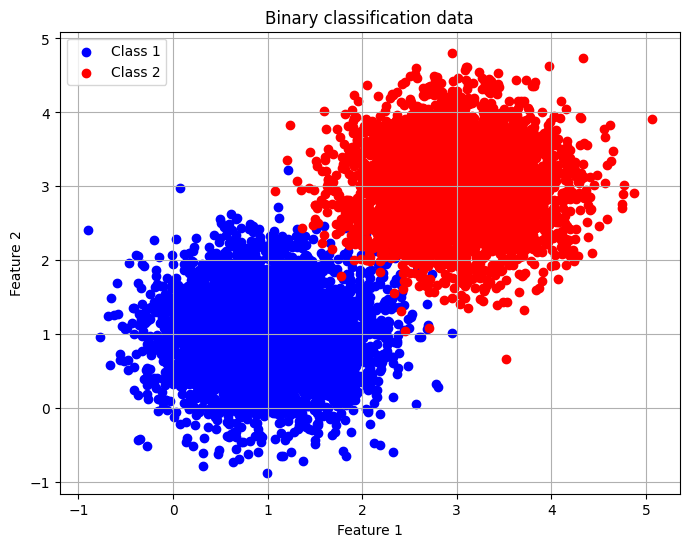

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])
tr_targets = np.reshape(tr_targets, (tr_targets.shape[0], 1))

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])
te_targets = np.reshape(te_targets, (te_targets.shape[0], 1))

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


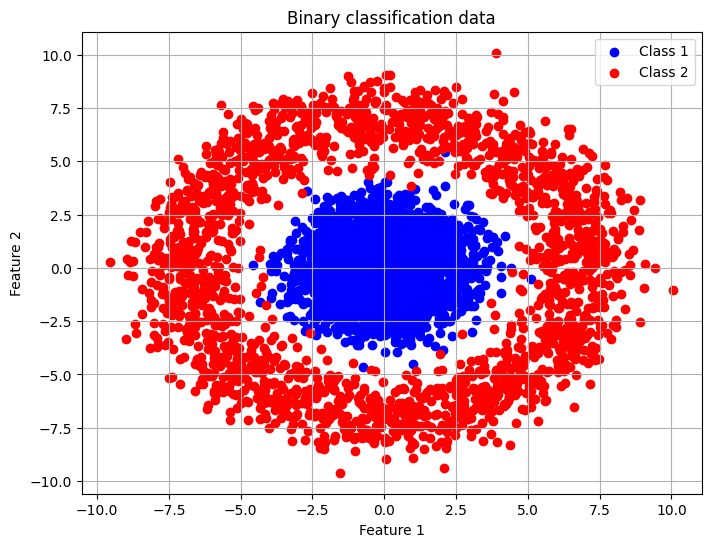

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################

# Remaining:
# For the DNN, tryout different techniques for vanishing gradients and optimally initializing the weights (from previous parts), plot the 3d graph
# Observations
def LR_Accuracy(Y_test, Y_pred):
    accuracy = np.mean(Y_pred == Y_test)

    return accuracy*100

##################################################
#Part-5)-b: Complete the below logistic regression function
##################################################
def sigmoid(a):
    a = np.clip(a, -750, 750)
    return 1/(1+np.exp(-a))


def Logistic_Regression(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Predictions on test data
  max_iter = 100 #max number of ierations for parameter update
  threshold = 0.5
  X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))          #Data. Append ones to the training data to take care of the bias
  w = np.zeros((X.shape[1], 1))         #Initialize the weight vector

  accuracies = []
  for iter in range(0,max_iter,1):

    preds = sigmoid(np.dot(X, w)[:])   #Predictions on X. Sigmoid(w^T.x)

    error = preds - Y_train    #Difference between preds and Y_train

    R = np.diag(np.multiply(preds, 1 - preds)[:, 0])
    hessian = np.dot(X.T, np.dot(R, X))

    #Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate
    grad = np.dot(X.T, error)

    try:
      change = np.dot(np.linalg.inv(hessian), grad)
    except np.linalg.LinAlgError:
      change = np.dot(np.linalg.inv(hessian + 1e-4*np.eye(hessian.shape[0])), grad)

    w = w - change

  #Test data predictions
  X_te = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
  test_preds = sigmoid(np.dot(X_te, w)[:])

  #Compare the predictions with 0, to output the decision

  test_preds = (np.sign(test_preds - threshold) + 1)/2

  #Return the predicted test labels
  return test_preds, w

Y_pred, w_opt= Logistic_Regression(tr_data, tr_targets, te_data)

LR_acc = LR_Accuracy(te_targets, Y_pred)
print('\n\n Accuracy with Logistic Regression:', LR_acc, '\n\n')

def Prediction(x, w_pred):
    return -(w_pred[1]*x + w_pred[0])/w_pred[2]

x = np.linspace(-1, 5, 100)

# Error in the plot

plt.figure(figsize=(8, 6))
plt.plot(x, Prediction(x, w_opt), color='green', label = "Decision Boundary")
plt.scatter(class1_te[:, 0], class1_te[:, 1], color='blue', label = "Original Class 1 Points")
plt.scatter(class2_te[:, 0], class2_te[:, 1], color='red', label = "Original Class 2 Points")
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.title("Logistic Regression: Test Data")
plt.grid()
plt.legend(loc = 'upper right')
plt.show()

##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################
##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.maximum(0, inp)
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = np.maximum(0, np.sign(inp))
  return outp

#Complete the below function to impliment softmax activation function

def sigmoid(inp):
    return 1/(1+np.exp(-inp))


def fwdPropagate(inputs, weights):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  a1 = np.dot(inputs, W1)
  z1 = ReLu(a1)
  a2 = np.dot(z1, W2)
  z2 = ReLu(a2)
  a3 = np.dot(z2, W3)
  out = sigmoid(a3)

  outps = [inputs, z1, z2, out]

  #Return the requires outputs, i.e., final output and intermediate activations
  return outps


#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients

  W1 = W1 - learning_rate * dj_dw1
  W2 = W2 - learning_rate * dj_dw2
  W3 = W3 - learning_rate * dj_dw3

  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  W1, W2, W3 = weights

  #Compute the gradients
  Z2 = activations[2]

  Delta1 = activations[-1] - targets
  dj_dw3 = np.dot(Z2.T, Delta1)

  Z1 = activations[1]

  W3_aug = W3
  Z2_aug = Z2

  Delta2 = np.multiply(np.dot(Delta1, W3_aug.T), gradReLu(Z2_aug))
  dj_dw2 = np.dot(Z1.T, Delta2)

  Z0 = activations[0]

  W2_aug = W2
  Z1_aug = Z1
  Delta3 = np.multiply(np.dot(Delta2, W2_aug.T), gradReLu(Z1_aug))
  dj_dw1 = np.dot(Z0.T, Delta3)

  #Update the paramters using gradients
  gradients = [dj_dw1, dj_dw2, dj_dw3]

  weights = applyGradients(weights, gradients, learning_rate)

  #Return the updated parameters
  return weights


##################################################
#Train the network
##################################################

def One_of_k_coding(targets, num_classes):
    new_targets = np.zeros((targets.shape[0], num_classes))
    for i in range(targets.shape[0]):
        new_targets[i, targets[i]] = 1
    return new_targets

def reverse_one_of_k(new_targets, num_classes):
    targets = np.argmax(new_targets, axis=1)
    return targets


#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 1, epochs=30, train_val_split=0.9, learning_rate=0.001):
  #Set the hyperparameters
  hidden_units = 2
  n_classes = 1
  n_samples = inputs.shape[0]

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  data = np.hstack((inputs, targets_idx))
  np.random.shuffle(data)

  num_train = int(train_val_split * inputs.shape[0])
  train_data = data[:num_train, :]
  train_targets = data[:num_train, data.shape[1]-1 : data.shape[1]]
  n_batches = int(np.ceil(train_data.shape[0]/batch_size))

  val_data = data[num_train:, :]
  val_targets = data[num_train:, data.shape[1]-1 : data.shape[1]]

  #Randomly initialize the weights
  W1 = (np.random.rand(inputs.shape[1] , 3) - 0.5)/10
  W2 = (np.random.rand(3, 3) - 0.5)/10
  W3 = (np.random.rand(3, 1) - 0.5)/10

  weights = [W1, W2, W3]

  #Interate for epochs times
  for epoch in range(epochs):
    print("Epoch: " + str(epoch))
    #Shuffle the training data
    np.random.shuffle(train_data)
    #Interate through the batches of data
    for batch in range(n_batches):
      #Get the batch of data
      if batch == n_batches - 1:
          data_b = train_data[batch*batch_size:]
      else:
          data_b = train_data[batch*batch_size:(batch+1)*batch_size]
      #Forward propagation
      inputs_b = data_b[:, :inputs.shape[1]]
      targets_b = data_b[:, inputs.shape[1]:]
      activations = fwdPropagate(inputs_b, weights)

      #Backward propagation
      weights = backPropagate(inputs_b, targets_b, weights, activations, learning_rate)

  #Compute outpus on trianing data
  new_targets = fwdPropagate(train_data[:, :data.shape[1]-n_classes], weights)[-1]
  training_output = np.sign(np.sign(new_targets - 0.5) + 1)/2

  #Compute training accuracy, and training error
  train_accuracy = np.mean(training_output == train_targets)

  #Compute outputs on validation data
  new_targets_val = fwdPropagate(val_data[:, :data.shape[1]-n_classes], weights)[-1]
  val_output = np.sign(np.sign(new_targets_val - 0.5) + 1)/2

  #Compute validation accuracy, and validation error
  val_accuracy = np.mean(val_output == val_targets)

  #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy

  print("Train Accuracy:")
  print(train_accuracy)
  print("Validation Accuracy:")
  print(val_accuracy)

  #Save the parameter s of network
  return weights


#Call the training function to train the network

class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])
tr_targets = np.reshape(tr_targets, (tr_targets.shape[0], 1))

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])
te_targets = np.reshape(te_targets, (te_targets.shape[0], 1))


tr_data = tr_data*2

weights = training(tr_data, tr_targets, batch_size = tr_data.shape[0], epochs=10, train_val_split=0.9, learning_rate=0.001)

##################################################
#Evaluate the performance on test data
##################################################


te_data = te_data*2

new_targets_test = fwdPropagate(te_data, weights)[-1]
test_output = np.sign(np.sign(new_targets_test - 0.5) + 1)/2
mnist_testlabel = np.reshape(mnist_testlabel, (mnist_testlabel.shape[0],))

#Compute validation accuracy, and validation error
test_accuracy = np.mean(test_output == te_targets)
print("Test Accuracy:")
print(test_accuracy)

def plot_transform(data, targets, weights):
    transformed_data = fwdPropagate(data, weights)[-2]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot points for target 1
    ax.scatter(transformed_data[:int(transformed_data.shape[0]/2), 0],
               transformed_data[:int(transformed_data.shape[0]/2), 1],
               transformed_data[:int(transformed_data.shape[0]/2), 2],
               c='red', label='Target 1')

    # Plot points for target 0
    ax.scatter(transformed_data[int(transformed_data.shape[0]/2):, 0],
               transformed_data[int(transformed_data.shape[0]/2):, 1],
               transformed_data[int(transformed_data.shape[0]/2):, 2],
               c='blue', label='Target 1')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.legend()
    plt.show()

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()


plot_transform(tr_data, tr_targets, weights)





##################################################
#Compare the performance of both the models on linearly separable data
##################################################

In [ ]:
# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_tr = class1_data[:int(0.9*n_samples)]
class2_tr = class2_data[:int(0.9*n_samples)]
class1_te = class1_data[int(0.9*n_samples):]
class2_te = class2_data[int(0.9*n_samples):]

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])
tr_targets = np.reshape(tr_targets, (tr_targets.shape[0], 1))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])
te_targets = np.reshape(te_targets, (te_targets.shape[0], 1))

##################################################
#Classify the non-linearly separable data using linear classification models
##################################################


Y_pred, w_opt= Logistic_Regression(tr_data, tr_targets, te_data)

LR_acc = LR_Accuracy(te_targets, Y_pred)
print('\n\n Accuracy with Logistic Regression:', LR_acc, '\n\n')

x = np.linspace(-10, 10, 100)

plt.figure(figsize=(8, 6))
plt.plot(x, Prediction(x, w_opt), color='green', label = "Decision Boundary")
plt.scatter(class1_te[:, 0], class1_te[:, 1], color='blue', label = "Original Class 1 Points")
plt.scatter(class2_te[:, 0], class2_te[:, 1], color='red', label = "Original Class 2 Points")
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.title("Logistic Regression: Test Data")
plt.grid()
plt.legend(loc = 'upper right')
plt.show()





##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################


weights = training(tr_data, tr_targets, batch_size = tr_data.shape[0], epochs=300, train_val_split=0.9, learning_rate=0.00008)

test_output = fwdPropagate(te_data, weights)[-1]
test_output = np.sign((np.sign(test_output - 0.5) + 1)/2)
test_accuracy = np.mean(test_output == te_targets)

print("Test Accuracy for DNN:")
print(test_accuracy)





##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################










<b> Report your observations </b>

1. Data is extremely sensitive to high and low values that is fed into the sigmoid function. This can give bad results (as above). The data is to be normalized accurately and appropriate ranges of weights is to be used to prevent such results. (As done in first 4 parts)

